In [ ]:
import numpy as np
import math
import time
import scipy.signal
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt

In [ ]:
#Moving Average

mean = 4
std = 1.5
matrix = np.zeros((9,9))    #create a 9x9 matrix
for x in range(9):
    for y in range(9):
        matrix[x,y] = (1 / (2*(math.pi)*std*std))*math.e**(-1*(((x - mean)**2)/(2*std**2) + ((y-mean)**2)/(2*std**2)))
norm = np.linalg.norm(matrix)
movingAvg = matrix / norm
np.set_printoptions(suppress=True)
print("Moving Average in Decimals: \n", movingAvg)
print("\n There will be 81 multiplications per pixel to convolve an image with this h[m,n]")

Moving Average in Decimals: 
 [[0.00030692 0.00145409 0.00441714 0.00860341 0.01074436 0.00860341
  0.00441714 0.00145409 0.00030692]
 [0.00145409 0.00688907 0.02092716 0.04076053 0.05090375 0.04076053
  0.02092716 0.00688907 0.00145409]
 [0.00441714 0.02092716 0.06357109 0.12381957 0.15463193 0.12381957
  0.06357109 0.02092716 0.00441714]
 [0.00860341 0.04076053 0.12381957 0.2411676  0.30118188 0.2411676
  0.12381957 0.04076053 0.00860341]
 [0.01074436 0.05090375 0.15463193 0.30118188 0.37613065 0.30118188
  0.15463193 0.05090375 0.01074436]
 [0.00860341 0.04076053 0.12381957 0.2411676  0.30118188 0.2411676
  0.12381957 0.04076053 0.00860341]
 [0.00441714 0.02092716 0.06357109 0.12381957 0.15463193 0.12381957
  0.06357109 0.02092716 0.00441714]
 [0.00145409 0.00688907 0.02092716 0.04076053 0.05090375 0.04076053
  0.02092716 0.00688907 0.00145409]
 [0.00030692 0.00145409 0.00441714 0.00860341 0.01074436 0.00860341
  0.00441714 0.00145409 0.00030692]]

 There will be 81 multiplications 

In [ ]:
#split into row and column vectors

print("We know that the filter constructed previously must be a separable filter \n because the Gaussian function creates values that are a product of a \n vertical and a horizontal function. \n")

U, E, V = np.linalg.svd(movingAvg)
Row = V[0,:]
Col = U[:,0]
print("Row vector h_x[m]: ", Row)
print("Column vector h_y[n]: ", Col)

print("\n This time, you only need 18 multiplications per pixel for the two 1D filters \n as opposed to the 81 you would need if you didn't take advantage of separability.")

We know that the filter constructed in part a. must be a separable filter 
 because the Gaussian function creates values that are a product of a 
 vertical and a horizontal function. 

(9,)
Row vector h_x[m]:  [-0.01751908 -0.08300044 -0.25213308 -0.49108818 -0.61329491 -0.49108818
 -0.25213308 -0.08300044 -0.01751908]
Column vector h_y[n]:  [-0.01751908 -0.08300044 -0.25213308 -0.49108818 -0.61329491 -0.49108818
 -0.25213308 -0.08300044 -0.01751908]

 This time, you only need 18 multiplications per pixel for the two 1D filters 
 as opposed to the 81 you would need if you didn't take advantage of separability.


Full kernel time:  1.0465734004974365


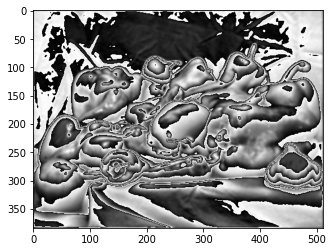

In [ ]:
#Do zero padding and convolve the image with the kernel

Row = np.array([Row]) #make separations into 2d arrays of 1x9
Col = np.array([Col]).T #and 9x1


def convolve2d(image, kernel):
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    
    # Do zero padding 
    image_padded = np.zeros((image.shape[0] + (kernel.shape[0]-1), 
                             image.shape[1] + (kernel.shape[1]-1)))   
    image_padded[(kernel.shape[0]//2):-(kernel.shape[0]//2), 
                 (kernel.shape[1]//2):-(kernel.shape[1]//2)] = image
    
    for x in range(image.shape[1]):     # Loop over every image pixels
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y + kernel.shape[0], x:x + kernel.shape[1]]).sum()
    return output

img_PIL = Image.open("/content/peppers (2).png")
pixels = np.asarray(img_PIL)
start = time.time()
blurImg = convolve2d(pixels, movingAvg)
end = time.time()
start2 = time.time()
#blurImg2 = convolve2d(pixels, Row)
#blurImg3 = convolve2d(blurImg2, Col)
end2 = time.time()
print("Full kernel time: ", end - start)
plt.imshow(blurImg, cmap=plt.cm.gray)
plt.show()
#print("Separate kernel time: ", end2 - start2)
#plt.imshow(blurImg3, cmap=plt.cm.gray)
#plt.show()